Example 1 :SARIMA with seasonal pattern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01',periods=48,freq='M')
trend = np.linspace(100,200,48)
seasonality = 20*np.sin(2*np.pi*date_range.month/12)
noise = np.random.normal(0,5,48)
data = trend + seasonality + noise

/tmp/ipython-input-146531441.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01',periods=48,freq='M')


In [3]:
df = pd.DataFrame({'Sales':data},index=date_range)

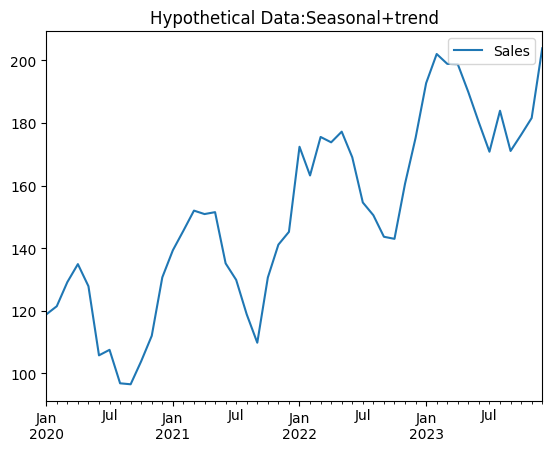

In [4]:
#plot
df.plot(title='Hypothetical Data:Seasonal+trend')
plt.show()

In [5]:
#Fit SARIMA
model = SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
result = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [6]:
forecast = result.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

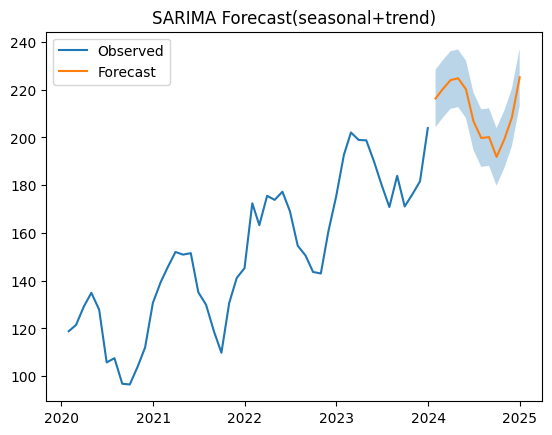

In [7]:
plt.plot(df,label='Observed')
plt.plot(forecast_df['mean'],label='Forecast')
plt.fill_between(forecast_df.index,forecast_df['mean_ci_lower'],forecast_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(seasonal+trend)')
plt.legend()
plt.show()

Example 02

In [8]:
np.random.seed(1)
dates = pd.date_range(start='2021-01',periods=36,freq='M')
seasonality = 30+15*np.sin(2*np.pi*dates.month/12)
noise = np.random.normal(0,3,36)
values =  seasonality + noise
df1= pd.DataFrame({'Value':values},index=dates)

/tmp/ipython-input-2941017905.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01',periods=36,freq='M')


In [9]:
model = SARIMAX(df1['Value'],order=(1,0,0),seasonal_order=(1,1,0,12))
res = model.fit()

In [10]:
fcast = res.get_forecast(steps=12)
fcast_df = fcast.summary_frame()

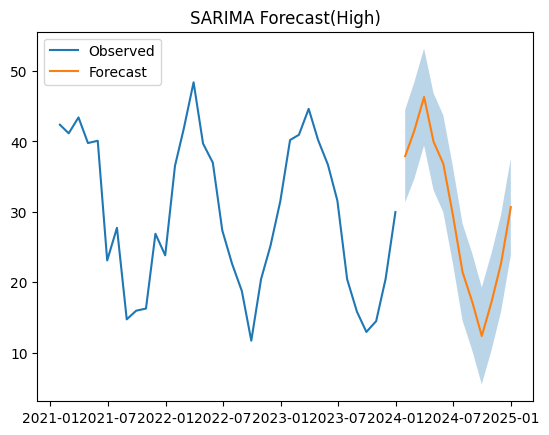

In [11]:
plt.plot(df1,label='Observed')
plt.plot(fcast_df['mean'],label='Forecast')
plt.fill_between(fcast_df.index,fcast_df['mean_ci_lower'],fcast_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(High)')
plt.legend()
plt.show()

Example 3 :SARIMA using multiplicative

In [12]:
np.random.seed(2)
months = pd.date_range(start='2019-01',periods=60,freq='M')
trend = np.linspace(80,120,60)
seasonal_factor = 1+0.4*np.sin(2*np.pi*months.month/12)
noise = np.random.normal(0,2,60)
values =  trend * seasonal_factor + noise
df2 = pd.DataFrame({'Value':values},index=months)

/tmp/ipython-input-2908437248.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2019-01',periods=60,freq='M')


In [13]:
model = SARIMAX(df2['Value'],order=(1,1,1),seasonal_order=(1,1,1,12))
res = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [14]:
pred = res.get_forecast(steps=12)
pred_df = pred.summary_frame()

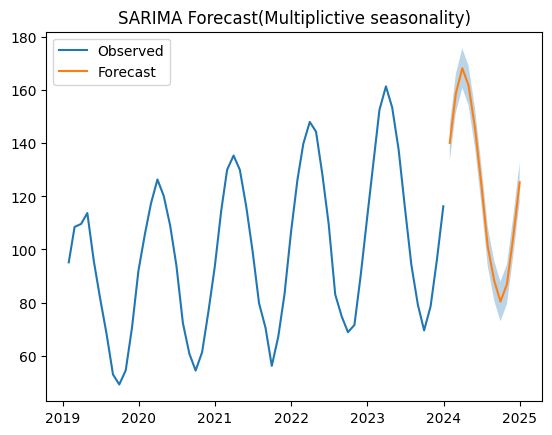

In [15]:
plt.plot(df2,label='Observed')
plt.plot(pred_df['mean'],label='Forecast')
plt.fill_between(pred_df.index,pred_df['mean_ci_lower'],pred_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(Multiplictive seasonality)')
plt.legend()
plt.show()

Example 4 : SARIMA with irregular seasonal pattern

In [16]:
np.random.seed(3)
months = pd.date_range(start='2020-01',periods=48,freq='M')
pattern = np.random.choice([10,20,30],size=12,replace=True)
seasonality = np.tile(pattern,4)
trend = 0.5 * np.arange(48)
noise = np.random.normal(0,5,48)
values =  trend + seasonality+ noise
df3 = pd.DataFrame({'Value':values},index=months)

/tmp/ipython-input-593869948.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01',periods=48,freq='M')


In [17]:
model = SARIMAX(df3['Value'],order=(1,1,1),seasonal_order=(2,1,0,12))
res = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
future = res.get_forecast(steps=12)
future_df = future.summary_frame()

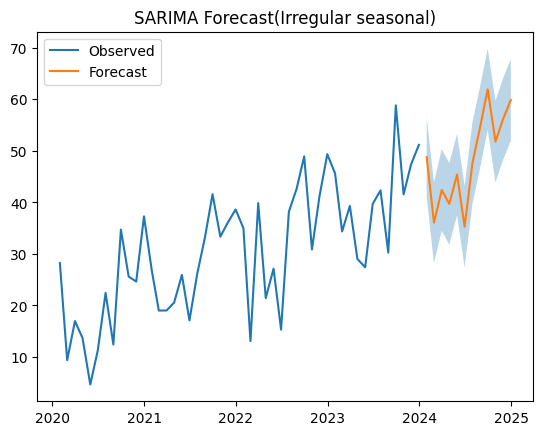

In [19]:
plt.plot(df3,label='Observed')
plt.plot(future_df['mean'],label='Forecast')
plt.fill_between(future_df.index,future_df['mean_ci_lower'],future_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(Irregular seasonal)')
plt.legend()
plt.show()

Example 5 : SARIMA with weak seasonality and strong noise

In [20]:
np.random.seed(4)
months = pd.date_range(start='2021-01',periods=48,freq='M')
seasonal= 5*np.sin(2*np.pi*months.month/12)
noise = np.random.normal(0,10,48)
values =  50 + seasonal + noise
df4 = pd.DataFrame({'Value':values},index=months)

/tmp/ipython-input-671884074.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2021-01',periods=48,freq='M')


In [21]:
model = SARIMAX(df4['Value'],order=(0,1,1),seasonal_order=(1,1,1,12))
res = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [22]:
forecast = res.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

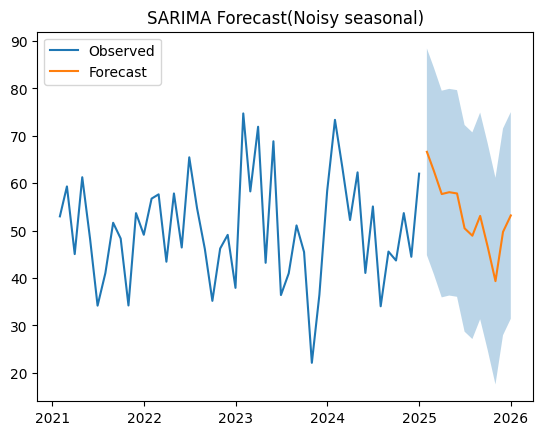

In [23]:
plt.plot(df4,label='Observed')
plt.plot(forecast_df['mean'],label='Forecast')
plt.fill_between(forecast_df.index,forecast_df['mean_ci_lower'],forecast_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(Noisy seasonal)')
plt.legend()
plt.show()

EXAMPLE 06

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [25]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url,parse_dates=['Month'],index_col='Month')
data.columns = ['Passengers']

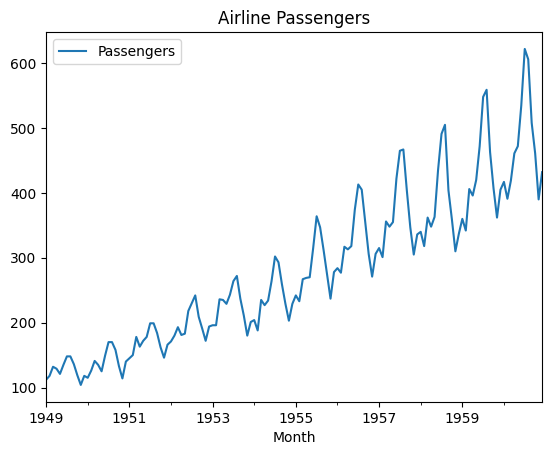

In [26]:
data.plot(title='Airline Passengers')
plt.show()

In [27]:
#ADF test
result = adfuller(data['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


In [28]:
sarima = SARIMAX(data['Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_fit = sarima.fit()
print(sarima_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Sun, 21 Sep 2025   AIC                           1022.299
Time:                                    18:12:34   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

In [29]:
#forecast
forecast = sarima_fit.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

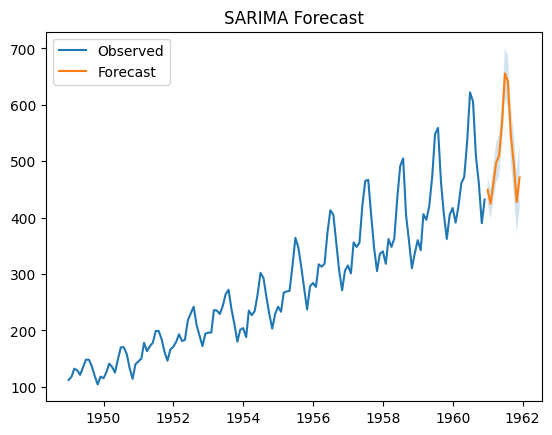

In [30]:
plt.plot(data['Passengers'],label='Observed')
plt.plot(forecast_df['mean'],label='Forecast')
plt.fill_between(forecast_df.index,forecast_df['mean_ci_lower'],forecast_df['mean_ci_upper'],alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


Example 07 - SARIMA on synthetic seasonal sales data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
np.random.seed(0)
months = pd.date_range(start='2015-01',periods=72,freq='M')
trend = np.linspace(100,200,72)
seasonal = 10*np.sin(2*np.pi*months.month/12)
noise = np.random.normal(0,5,72)
sales = trend + seasonal + noise

/tmp/ipython-input-334197240.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2015-01',periods=72,freq='M')


In [33]:
df = pd.DataFrame({'Sales':sales},index=months)
df.plot(title='Synthetic Seasonal Sales Data')
plt.show()

In [34]:
model = SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

In [35]:
forecast = results.get_forecast(steps=12)
pred_df = forecast.summary_frame()

In [36]:
plt.plot(df['Sales'],label='Observed')
plt.plot(pred_df['mean'],label='Forecast')
plt.fill_between(pred_df.index,pred_df['mean_ci_lower'],pred_df['mean_ci_upper'],alpha=0.3)
plt.title('SARIMA Forecast(Synthetic data)')
plt.legend()
plt.show()


Example 08:SARIMA with multiplicative seasonal component

In [37]:
np.random.seed(2)
months = pd.date_range(start='2020-01',periods=60,freq='M')
trend = np.linspace(50,150,60)
seasonality = 1+0.3*np.sin(2*np.pi*months.month/12)
noise = np.random.normal(0,5,60)
sales =  trend * seasonality + noise


/tmp/ipython-input-3470724933.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01',periods=60,freq='M')


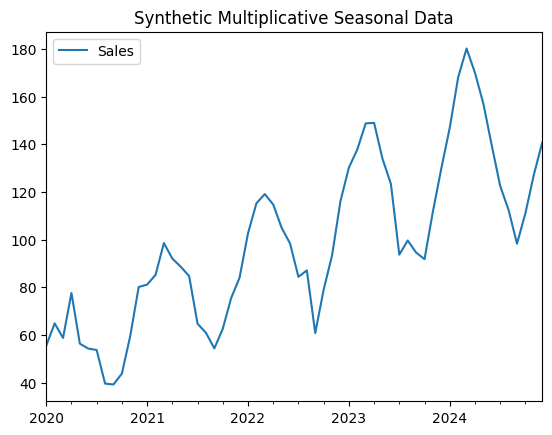

In [38]:
df = pd.DataFrame({'Sales':sales},index=months)
df.plot(title='Synthetic Multiplicative Seasonal Data')
plt.show()

In [41]:
model = SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [42]:
forecast = results.get_forecast(steps=12)
pred = forecast.summary_frame()

In [43]:
plt.plot(df,label='Observed')
plt.plot(pred['mean'],label='Forecast')
plt.fill_between(pred.index,pred['mean_ci_lower'],pred['mean_ci_upper'],alpha=0.2)
plt.title('SARIMA Forecast(Synthetic data)')
plt.legend()
plt.show()
